## Gradio Pets

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 197 kB 30.1 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 7.6 MB/s  eta 0:00:01


In [1]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

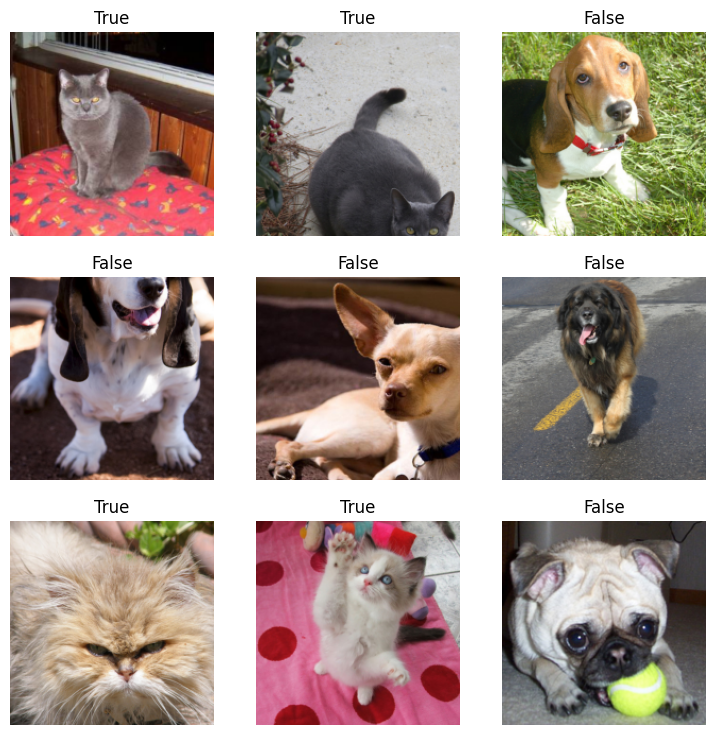

In [3]:
dls.show_batch()

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/Users/ignaciomoyaredondo/opt/anaconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ignaciomoyaredondo/opt/anaconda3/envs/fastai/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.215371,0.055047,0.020298,02:25


epoch,train_loss,valid_loss,error_rate,time
0,0.104920,0.047117,0.014208,03:50
1,0.051169,0.030950,0.012855,03:48
2,0.024891,0.023437,0.006766,03:50


In [5]:
learn.export('model.pkl')